<a href="https://colab.research.google.com/github/vOILEt-W/ML_projects/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing common ML libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import torch
import statsmodels.api as sm

print("Common ML libraries imported successfully!")


Common ML libraries imported successfully!


In [ ]:
heart_disease_data=pd.read_csv('/content/HeartDiseaseTrain-Test.csv')
heart_disease_data.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


Q2: Subset Selection Algorithm (Forward, Backward, Floating Search)

In [ ]:
heart_disease_data.shape

(1025, 14)

In [ ]:
heart_disease_data.info

<bound method DataFrame.info of       age     sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0      52    Male   Typical angina                     125          212   
1      53    Male   Typical angina                     140          203   
2      70    Male   Typical angina                     145          174   
3      61    Male   Typical angina                     148          203   
4      62  Female   Typical angina                     138          294   
...   ...     ...              ...                     ...          ...   
1020   59    Male  Atypical angina                     140          221   
1021   60    Male   Typical angina                     125          258   
1022   47    Male   Typical angina                     110          275   
1023   50  Female   Typical angina                     110          254   
1024   54    Male   Typical angina                     120          188   

         fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0       Lower than 120 mg/ml  ST-T wave abnormality             168   
1     Greater than 120 mg/ml                 Normal             155   
2       Lower than 120 mg/ml  ST-T wave abnormality             125   
3       Lower than 120 mg/ml  ST-T wave abnormality             161   
4     Greater than 120 mg/ml  ST-T wave abnormality             106   
...                      ...                    ...             ...   
1020    Lower than 120 mg/ml  ST-T wave abnormality             164   
1021    Lower than 120 mg/ml                 Normal             141   
1022    Lower than 120 mg/ml                 Normal             118   
1023    Lower than 120 mg/ml                 Normal             159   
1024    Lower than 120 mg/ml  ST-T wave abnormality             113   

     exercise_induced_angina  oldpeak        slope  \
0                         No      1.0  Downsloping   
1                        Yes      3.1    Upsloping   
2                        Yes      2.6    Upsloping   
3                         No      0.0  Downsloping   
4                         No      1.9         Flat   
...                      ...      ...          ...   
1020                     Yes      0.0  Downsloping   
1021                     Yes      2.8         Flat   
1022                     Yes      1.0         Flat   
1023                      No      0.0  Downsloping   
1024                      No      1.4         Flat   

     vessels_colored_by_flourosopy        thalassemia  target  
0                              Two  Reversable Defect       0  
1                             Zero  Reversable Defect       0  
2                             Zero  Reversable Defect       0  
3                              One  Reversable Defect       0  
4                            Three       Fixed Defect       0  
...                            ...                ...     ...  
1020                          Zero       Fixed Defect       1  
1021                           One  Reversable Defect       0  
1022                           One       Fixed Defect       0  
1023                          Zero       Fixed Defect       1  
1024                           One  Reversable Defect       0  

[1025 rows x 14 columns]>

In [ ]:
heart_disease_data.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [ ]:
X = heart_disease_data.drop('target', axis=1)  # Replace 'target_variable_column' with the actual name of your target variable column
y = heart_disease_data['target']

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/HeartDiseaseTrain-Test.csv"  # Update the path if necessary
heart_disease_data = pd.read_csv(file_path)

# Display dataset info
print("\n📌 Dataset Shape:", heart_disease_data.shape)
print("\n📌 Missing Values:\n", heart_disease_data.isnull().sum())

# Encode categorical variables
categorical_cols = heart_disease_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    heart_disease_data[col] = le.fit_transform(heart_disease_data[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X = heart_disease_data.drop(columns=['target'])  # Features
y = heart_disease_data['target']  # Target

# Standardize numerical features (Convert back to DataFrame after scaling)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Logistic Regression model
model = LogisticRegression()

# ✅ Forward Selection
sfs_forward = SFS(model,
                  k_features=5,
                  forward=True,
                  floating=False,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1).fit(X_train, y_train)

# ✅ Backward Selection
sfs_backward = SFS(model,
                   k_features=5,
                   forward=False,
                   floating=False,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1).fit(X_train, y_train)

# ✅ Extracting Selected Features
forward_features = list(X.columns[list(sfs_forward.k_feature_idx_)])  # Convert tuple_



📌 Dataset Shape: (1025, 14)

📌 Missing Values:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


Q3. Find out Factor Analysis on your own dataset. Observe whether it can be implemented
on not.  

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=e28c824238308186a6196197edbd3ee962f0e4c5df25c4e393faef6c39acc9f9
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


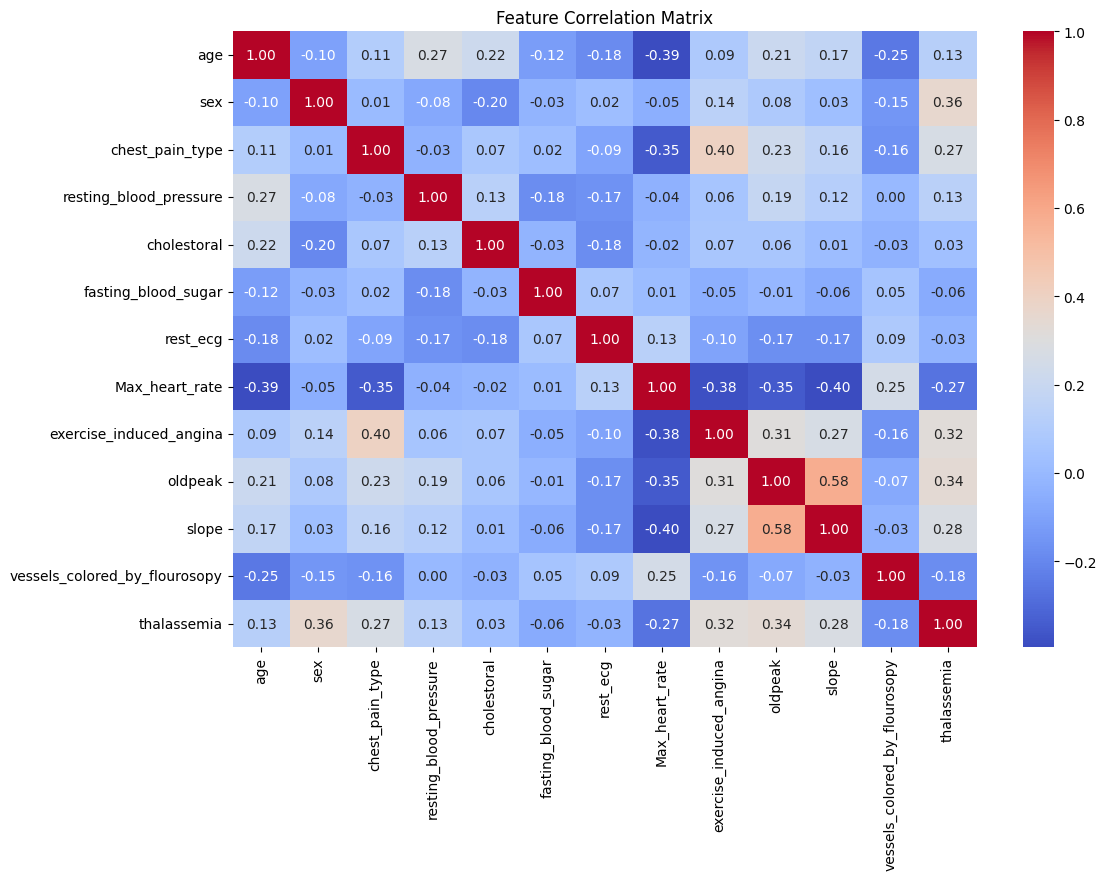


✅ Bartlett’s Test: p-value = 0.0

✅ Kaiser-Meyer-Olkin (KMO) Test:  0.708582531790639


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo # Importing the necessary module

# Load dataset
file_path = "/content/HeartDiseaseTrain-Test.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (excluding target)
X = df.drop(columns=['target'])

# Step 1: Check correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Step 2: Perform Bartlett’s test (Checks if factor analysis is suitable)
bartlett_test_stat, bartlett_p_value = calculate_bartlett_sphericity(X)
print("\n✅ Bartlett’s Test: p-value =", bartlett_p_value)

# Step 3: Perform KMO Test (Checks sampling adequacy)
kmo_all, kmo_model = calculate_kmo(X)
print("\n✅ Kaiser-Meyer-Olkin (KMO) Test: ", kmo_model)

# Step 4: Apply Factor Analysis if Bartlett & KMO confirm suitability


Give comparison between PCA, FA, and LDA.

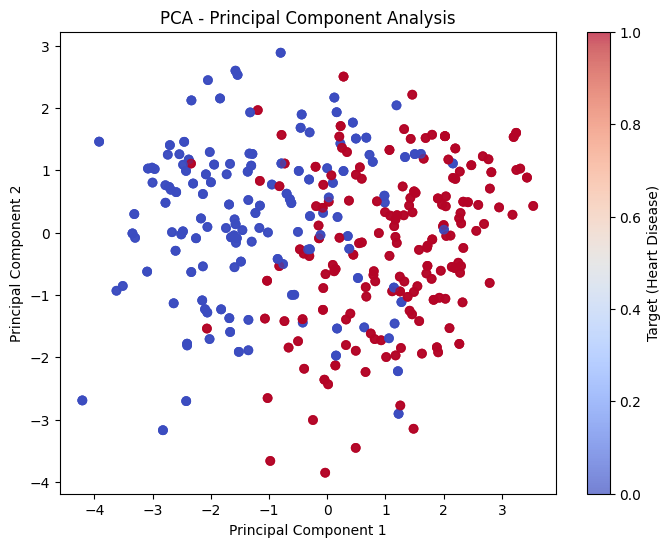

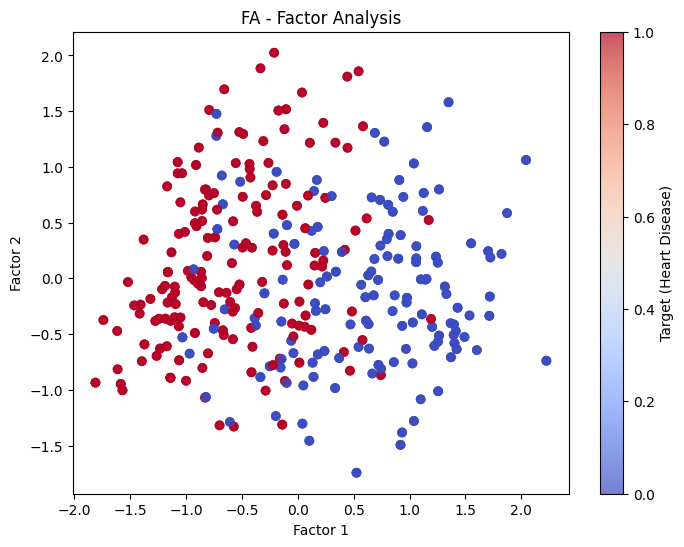

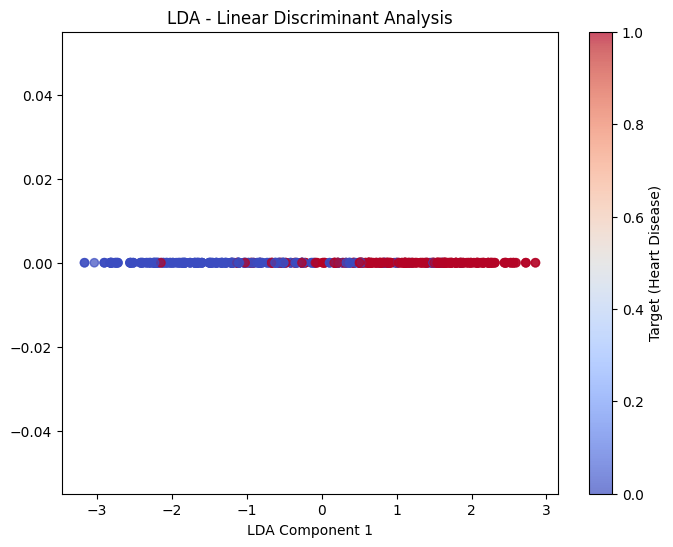

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/HeartDiseaseTrain-Test.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Principal Component Analysis")
plt.colorbar(label="Target (Heart Disease)")
plt.show()


fa = FactorAnalysis(n_components=2)  # Extract 2 latent factors
X_fa = fa.fit_transform(X_scaled)

# Plot FA results
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("FA - Factor Analysis")
plt.colorbar(label="Target (Heart Disease)")
plt.show()


lda = LDA(n_components=1)  # Change n_components to 1
X_lda = lda.fit_transform(X_train, y_train)

# Plot LDA results (adjusted for 1 component)
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], [0] * len(X_lda), c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel("LDA Component 1")
plt.title("LDA - Linear Discriminant Analysis")
plt.colorbar(label="Target (Heart Disease)")
plt.show()

Q5

Estimated values:
 a = 6.9859, b = 1.1096


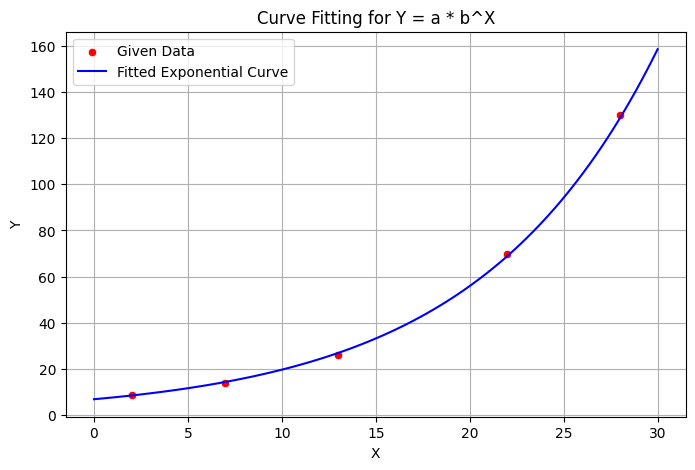

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([2, 7, 13, 22, 28]).reshape(-1, 1)
Y = np.array([9, 14, 26, 70, 130])

# Apply logarithm to Y
log_Y = np.log(Y)

# Perform Linear Regression
model = LinearRegression()
model.fit(X, log_Y)

# Extract log values
log_a = model.intercept_
log_b = model.coef_[0]

# Convert back to original values
a = np.exp(log_a)
b = np.exp(log_b)

print(f"Estimated values:\n a = {a:.4f}, b = {b:.4f}")

# Plotting the original and predicted values
X_test = np.linspace(0, 30, 100).reshape(-1, 1)  # Generate smooth X values
Y_pred = a * (b ** X_test)  # Compute corresponding Y values

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.flatten(), y=Y, color='red', label="Given Data")
plt.plot(X_test.flatten(), Y_pred, label="Fitted Exponential Curve", color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Curve Fitting for Y = a * b^X")
plt.legend()
plt.grid()
plt.show()


Q6-Define Pre and Post Pruning, to know when to stop splitting in Decision Tree making
using Information Gain.

Pre-Pruned Tree Accuracy: 0.7951
Best ccp_alpha for Post-Pruning: 0.0000
Post-Pruned Tree Accuracy: 0.9854


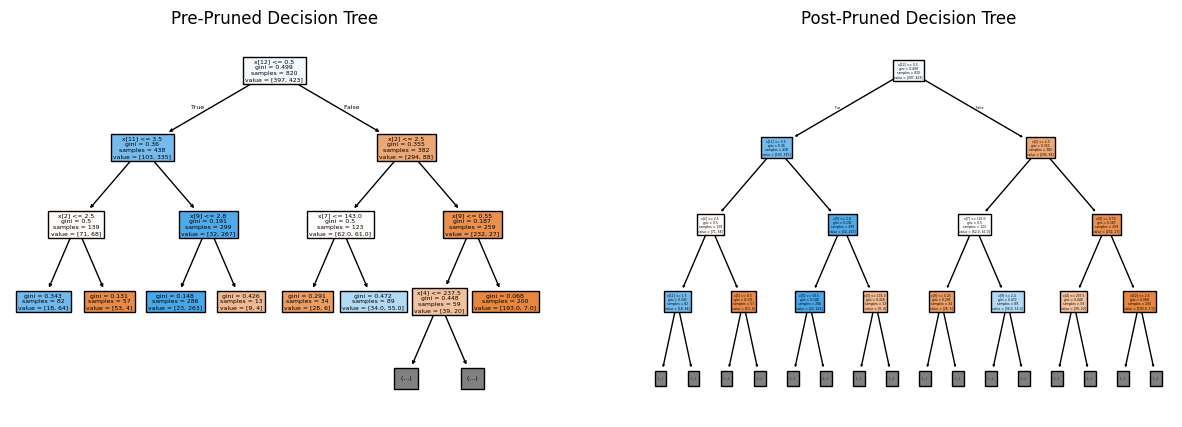

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/content/HeartDiseaseTrain-Test.csv")  # Update the path if needed

# Encode categorical columns if any
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Split data into features & target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pre_pruned_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_impurity_decrease=0.01, random_state=42)
pre_pruned_tree.fit(X_train, y_train)

# Evaluate Pre-Pruned Tree
y_pred_pre = pre_pruned_tree.predict(X_test)
acc_pre = accuracy_score(y_test, y_pred_pre)
print(f"Pre-Pruned Tree Accuracy: {acc_pre:.4f}")


full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

# Get CCP path (alpha values)
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train models for different alpha values
pruned_trees = [DecisionTreeClassifier(ccp_alpha=alpha, random_state=42).fit(X_train, y_train) for alpha in ccp_alphas]

# Evaluate post-pruned trees
acc_scores = [accuracy_score(y_test, tree.predict(X_test)) for tree in pruned_trees]

# Find best alpha (max accuracy)
best_alpha = ccp_alphas[np.argmax(acc_scores)]
print(f"Best ccp_alpha for Post-Pruning: {best_alpha:.4f}")

# Train best post-pruned tree
post_pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
post_pruned_tree.fit(X_train, y_train)

# Evaluate Post-Pruned Tree
y_pred_post = post_pruned_tree.predict(X_test)
acc_post = accuracy_score(y_test, y_pred_post)
print(f"Post-Pruned Tree Accuracy: {acc_post:.4f}")


plt.figure(figsize=(15, 5))

# Plot Pre-Pruned Tree
plt.subplot(1, 2, 1)
plot_tree(pre_pruned_tree, filled=True, max_depth=3)
plt.title("Pre-Pruned Decision Tree")

# Plot Post-Pruned Tree
plt.subplot(1, 2, 2)
plot_tree(post_pruned_tree, filled=True, max_depth=3)
plt.title("Post-Pruned Decision Tree")

plt.show()
